In [246]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings("ignore")

from math import ceil
import numpy as np
import pandas as pd
import scipy.stats as stats

import altair as alt

import statsmodels.api as sm
import statsmodels.robust

from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


import seaborn as sns
import glm
# from glm.glm import GLM
# from glm.families import Gaussian

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import ast
import re
from itertools import combinations

import math

from tqdm import tqdm
tqdm.pandas()

In [247]:
## Importing the Data

In [248]:
## import main data

#mvp_data = pd.read_csv('../data/guitar_scrap_02132022.csv')
#mvp_data = pd.read_csv('../data/eng_MVP_data.csv')
modeling_data = pd.read_csv('../data/modeling_df.csv',index_col=0)
modeling_data.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 96337 entries, 0 to 0
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        96337 non-null  object 
 1   condition    96337 non-null  object 
 2   model        96337 non-null  object 
 3   brand        96337 non-null  object 
 4   origin       96337 non-null  object 
 5   type_code    96337 non-null  int64  
 6   origin_code  96337 non-null  float64
 7   cond_score   96337 non-null  int64  
 8   body_code    96337 non-null  int64  
 9   price_code   96337 non-null  int64  
 10  price        96337 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 8.8+ MB


In [249]:
modeling_data.isna().sum()

title          0
condition      0
model          0
brand          0
origin         0
type_code      0
origin_code    0
cond_score     0
body_code      0
price_code     0
price          0
dtype: int64

## Model Prep

In [250]:
#modeling_data=modeling_data[modeling_data.cond_score>1]
#modeling_data=modeling_data[modeling_data.price>500]
modeling_data=modeling_data[modeling_data.price<5000]

In [251]:
modeling_data.describe()

,type_code,origin_code,cond_score,body_code,price_code,price
count,"93,009.00","93,009.00","93,009.00","93,009.00","93,009.00","93,009.00"
mean,0.00,1.63,3.25,2.21,1.90,"1,399.08"
std,0.00,1.72,0.65,2.06,1.76,"1,117.02"
min,0.00,0.00,1.00,0.00,0.00,325.00
25%,0.00,0.00,3.00,0.00,1.00,640.00
50%,0.00,1.00,3.00,2.00,1.00,950.00
75%,0.00,4.00,3.00,4.00,3.00,"1,699.99"
max,0.00,4.00,5.00,6.00,6.00,"4,999.00"


# Begin Modeling! 

In [252]:
modeling_data.columns

Index(['title', 'condition', 'model', 'brand', 'origin', 'type_code',
       'origin_code', 'cond_score', 'body_code', 'price_code', 'price'],
      dtype='object')

In [253]:

#features_in = ['type_code','origin_code','cond_score','price_code'] 
features_in = ['type_code','origin_code','cond_score','body_code','price_code']



X = modeling_data[features_in] 
#X = pd.get_dummies(data=X, drop_first=True) # since we numerically encoded the categorical data, no need for dummies!  
X.head()
X.shape

(93009, 5)

In [254]:
Y = modeling_data['price']


In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(74407, 5)
(18602, 5)
(74407,)
(18602,)


In [256]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

# print the intercept
print(model.intercept_)

327.2423649056582


In [257]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
type_code,0.00
origin_code,-31.58
cond_score,-30.45
body_code,15.16
price_code,626.34


In [258]:
predictions = model.predict(X_test)
predictions

array([4054.56086124,  862.10222921,  264.96045312, ...,  859.71380993,
       2049.22052355,  171.34391064])

Text(0, 0.5, "['type_code', 'origin_code', 'cond_score', 'body_code', 'price_code']")

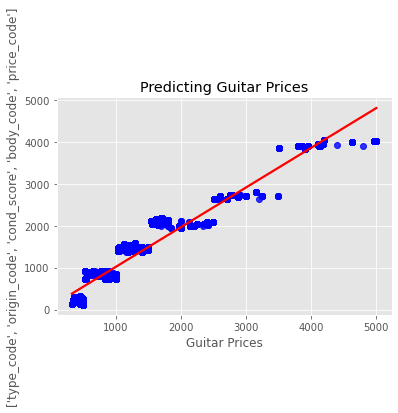

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.regplot(x='X-Axis', y='Y-Axis', data=df, scatter_kws={"color": "red"}, line_kws={"color": "green"})
p = sns.regplot(y_test,predictions,scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set(title='Predicting Guitar Prices')

plt.xlabel("Guitar Prices")
plt.ylabel(f'{features_in}')

In [260]:
#manually test accuracy
predictions = model.predict(X_test)
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
#df_results['accuracy'] = df_results.Predicted / df_results.Actual if (df_results.Predicted / df_results.Actual)<1.0 else 
df_comparison = pd.merge(df_results,modeling_data, how="inner", left_on="Actual", right_on="price")
df_comparison.columns

Index(['Actual', 'Predicted', 'title', 'condition', 'model', 'brand', 'origin',
       'type_code', 'origin_code', 'cond_score', 'body_code', 'price_code',
       'price'],
      dtype='object')

In [261]:
modeling_data.columns

Index(['title', 'condition', 'model', 'brand', 'origin', 'type_code',
       'origin_code', 'cond_score', 'body_code', 'price_code', 'price'],
      dtype='object')

In [262]:
pred_df = df_comparison[['title',
               'Predicted', 
               'Actual',
               'brand',
               'origin',
               'condition',
               'cond_score']]
pd.options.display.float_format = '{:,.2f}'.format
pred_df[pred_df.Actual<5000].value_counts().head(10)

title                                                                                                Predicted  Actual    brand          origin         condition  cond_score
Schecter Sun Valley Electric Guitar(Jacksonville, FL)                                                862.23     649.99    Schecter       Asia           Very Good  3             616010
Diamond Bird of Prey Electric Guitar (Jacksonville, FL)                                              862.23     649.99    Diamond        Asia           Very Good  3             583730
Silvertone Classic 1423 Jupiter Electric Guitar 2021 Blackgold Metallic                              235.89     499.00    Silvertone     United States  0          3             571368
Schecter Omen Extreme-6                                                                              235.89     499.00    Schecter       Indonesia      0          3             476976
Sterling JP150                                                                            

In [263]:
# loading library
import pickle

In [264]:
# create an iterator object with write permission - model.pkl
with open('guitar.pkl', 'wb') as files:
    pickle.dump(model, files)
    
    
    

In [265]:
## upload model to AWS
import boto3
import configparser


config = configparser.ConfigParser()
config.read('../aws.ini')
    
AWS_key_id     = config['aws']['aws_access_key_id']
AWS_secret_key = config['aws']['aws_secret_access_key']  

#Creating Session With Boto3.
session = boto3.Session(
aws_access_key_id = AWS_key_id,
aws_secret_access_key =  AWS_secret_key,
region_name = 'us-east-1'
)

#Creating S3 Resource From the Session.
#s3 = session.resource('s3')

#txt_data = b'This is the content of the file uploaded from python boto3 asdfasdf'

#object = s3.Object('dataforguitarapp', '../models/guitar.pkl')

#result = object.put(Body=txt_data)




s3_resource = session.resource('s3')

bucket='dataforguitarapp'
key= 'guitar.pkl'

pickle_byte_obj = pickle.dumps(model)

s3_resource.Object(bucket,key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': 'PNENB4N8PPNFVHPN',
  'HostId': '1MSTbhXYuI+pCjuF5w7J6bzxMegdh+gI9lNX2A0mLGh9T1D25RVJH26n8HLCHEvlfdd3bjkGwTg=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '1MSTbhXYuI+pCjuF5w7J6bzxMegdh+gI9lNX2A0mLGh9T1D25RVJH26n8HLCHEvlfdd3bjkGwTg=',
   'x-amz-request-id': 'PNENB4N8PPNFVHPN',
   'date': 'Mon, 21 Feb 2022 03:24:20 GMT',
   'x-amz-version-id': 'I23Y6HOgvEjHgCynXRJH6nezHIX8K30c',
   'etag': '"4f0505e60d8bf2542d8a079472e61abe"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"4f0505e60d8bf2542d8a079472e61abe"',
 'VersionId': 'I23Y6HOgvEjHgCynXRJH6nezHIX8K30c'}

## Let's take a further look at the model and how it scored

In [266]:
from sklearn.metrics import mean_squared_error
import math

actual = y_test
predicted = predictions

mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

print(f' MSE: {mse} , RMSE: {rmse}')

 MSE: 66101.98098424899 , RMSE: 257.10305518264266


In [220]:

# score fit model on test data
val_score = model.score(X_test, y_test)

# report results
print('\nValidation R^2 score was:', val_score)
print('Feature coefficient results: \n')
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ':', f'{coef:.2f}') 




Validation R^2 score was: 0.9516625361811872
Feature coefficient results: 

type_code : 0.00
origin_code : -27.40
cond_score : -22.89
price_code : 681.61


In [221]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train.values)

# apply the scaler to train set
X_tr = std.transform(X_train.values)

# apply the scaler to test set
X_tr = std.transform(X_test.values) 

In [222]:
# Ridge Regression
from sklearn.linear_model import Ridge
lr_model_ridge = Ridge(alpha = 2) # alpha is regularization strength
lr_model_ridge.fit(X_train,y_train)

Ridge(alpha=2)

## Let's look at the OLS model again and how it scored

In [223]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(f'Adj. R-Squared: {ls.rsquared_adj}')
print(f'R-Squared: {ls.rsquared}')
print(f'Mean Squared Error: {ls.mse_model}')
print(f'Log-likelihood: {ls.llf}')
print(f'The total (weighted) sum of squares centered about the mean: {ls.centered_tss}')
ls.summary()

Adj. R-Squared: 0.9513648587007228
R-Squared: 0.9513673658821628
Mean Squared Error: 23257631678.46855
Log-likelihood: -403333.521135103
The total (weighted) sum of squares centered about the mean: 73339592609.11604


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 3.795e+05
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:58:54   Log-Likelihood:            -4.0333e+05
No. Observations:               58196   AIC:                         8.067e+05
Df Residuals:                   58192   BIC:                         8.067e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         138.6617      5.298     26.173      0.000     128.278     149.046
type_code   -4.038e-13   6.74e-16   -599.308      0.000   -4.05e-13   -4.03e-13
origin_code   -27.4020      0.639    -42.870      0.000     -28.655     -26.149
cond_score    -22.8922      1.519    -15.072      0.000     -25.869     -19.915
price_code    681.6119      0.685    994.849      0.000     680.269     682.955
==============================================================================
Omnibus:                     5044.863   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8032.444
Skew:                           0.657   Prob(JB):                         0.00
Kurtosis:                       4.259   Cond. No.                     8.32e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.97e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Now let's try modeling using GLS instead of OLS

In [273]:
def runModel_compare(df,features_in):
    X = df[features_in] 
    #X = pd.get_dummies(data=X, drop_first=True)
    Y = df['price']

    #from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

    #from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train,y_train)

    # print the intercept
    # print(model.intercept_)

    coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
    #coeff_parameter

    predictions = model.predict(X_test)
    #predictions

    ## plotting the data
    #sns.regplot(x='X-Axis', y='Y-Axis', data=df, scatter_kws={"color": "red"}, line_kws={"color": "green"})
    p = sns.regplot(y_test,predictions,scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set(title=f'Model using {features_in}')

    plt.xlabel("Guitar Prices")
    plt.ylabel(f'Features')
    

    #from sklearn.metrics import mean_squared_error
    #import math

    actual = y_test
    predicted = predictions

    mse = mean_squared_error(actual, predicted)
    rmse = math.sqrt(mse)

    model.fit(X_train,y_train)
    
    print('--- Scores: ---')
    print(f'Model Score: {model.score(X_train,y_train)}')
    print(f'MSE: {mse} \nRMSE: {rmse}')
    
    X_train_Sm= sm.add_constant(X_train)
    X_train_Sm= sm.add_constant(X_train)
    ls=sm.GLS(y_train,X_train_Sm).fit()
    print(f'Adj. R-Squared: {ls.rsquared_adj}')
    print(f'R-Squared: {ls.rsquared}')
    #print(f'Mean Squared Error: {ls.mse_model}')
    print(f'Log-likelihood: {ls.llf}')    
    print('')
    print('--- Comparison ---')
    #manually test accuracy
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    #df_results['accuracy'] = df_results.Predicted / df_results.Actual if (df_results.Predicted / df_results.Actual)<1.0 else 
    df_comparison = pd.merge(df_results,modeling_data, how="inner", left_on="Actual", right_on="price")
    #df_comparison.columns

    pred_df = df_comparison[['title',
                   'Predicted', 
                   'Actual',
                   'brand',
                   'origin',
                   'condition']]
    pd.options.display.float_format = '{:,.2f}'.format
    compare_vals = pred_df[pred_df.Actual<5000].value_counts().head(20)
    print(compare_vals)
    print('--- Regression Plot --- ')
    
    # save the model to disk
    # create an iterator object with write permission - model.pkl
    with open('guitar.pkl', 'wb') as files:
        pickle.dump(model, files)

--- Scores: ---
Model Score: 0.9468424679387331
MSE: 66101.98098424899 
RMSE: 257.10305518264266
Adj. R-Squared: 0.9468396100837259
R-Squared: 0.9468424679387331
Log-likelihood: -518671.9516481226

--- Comparison ---
title                                                                                                Predicted  Actual    brand          origin         condition
Schecter Sun Valley Electric Guitar(Jacksonville, FL)                                                862.23     649.99    Schecter       Asia           Very Good    616010
Diamond Bird of Prey Electric Guitar (Jacksonville, FL)                                              862.23     649.99    Diamond        Asia           Very Good    583730
Silvertone Classic 1423 Jupiter Electric Guitar 2021 Blackgold Metallic                              235.89     499.00    Silvertone     United States  0            571368
Schecter Omen Extreme-6                                                                              235.

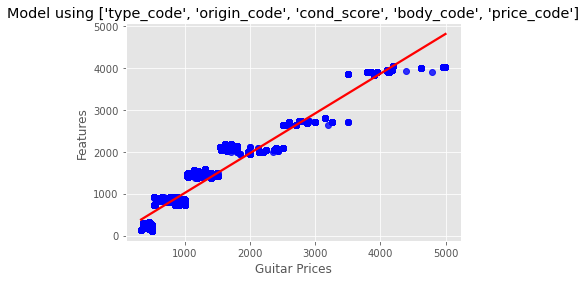

In [274]:
## if predictions seem better  let's export and use this model for the app
runModel_compare(modeling_data,features_in)

## Let's upload this model to AWS instead

In [275]:
#Creating Session With Boto3.
session = boto3.Session(
aws_access_key_id = AWS_key_id,
aws_secret_access_key =  AWS_secret_key,
region_name = 'us-east-1'
)

#Creating S3 Resource From the Session.
#s3 = session.resource('s3')

#txt_data = b'This is the content of the file uploaded from python boto3 asdfasdf'

#object = s3.Object('dataforguitarapp', '../models/guitar.pkl')

#result = object.put(Body=txt_data)




s3_resource = session.resource('s3')

bucket='dataforguitarapp'
key= 'guitar.pkl'

pickle_byte_obj = pickle.dumps(model)

s3_resource.Object(bucket,key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': 'RPPXKHK466D74ADB',
  'HostId': 'YAomce4aqhU+mn++kX3jMZk4JVK8AfefzRFj309z9gzeDULCx1MK2mFi/dImybSwHn7TNZYrDcM=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'YAomce4aqhU+mn++kX3jMZk4JVK8AfefzRFj309z9gzeDULCx1MK2mFi/dImybSwHn7TNZYrDcM=',
   'x-amz-request-id': 'RPPXKHK466D74ADB',
   'date': 'Mon, 21 Feb 2022 05:22:17 GMT',
   'x-amz-version-id': '21Wh_WhHAmLosi33E8JO6OjTsvVLEXJf',
   'etag': '"4f0505e60d8bf2542d8a079472e61abe"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"4f0505e60d8bf2542d8a079472e61abe"',
 'VersionId': '21Wh_WhHAmLosi33E8JO6OjTsvVLEXJf'}

In [192]:
print(pickle.format_version)

4.0


In [ ]:
modeling_data.columns

In [ ]:
#['condition','guitar_brand','guitar_model','guitar_origin','price_range'] 

lst_condition     = list(set(modeling_data['condition'].values.tolist()))
lst_guitar_brand  = list(set(modeling_data['guitar_brand'].values.tolist()))
lst_guitar_model  = list(set(modeling_data['guitar_model'].values.tolist()))
lst_guitar_origin = list(set(modeling_data['guitar_origin'].values.tolist()))
lst_price_range   = list(set(modeling_data['price_range'].values.tolist()))
